# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it.

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16).
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook.

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

6. Implement a new player with the following strategy:

    * Assign each card a value:
        * Cards 2 to 6 are +1
        * Cards 7 to 9 are 0
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings.

In [2]:
#1
import random

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks):
        self.num_decks = num_decks
        self.cards = []
        self.generate_decks()
        self.place_plastic_card()

    def generate_decks(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        self.cards = [Card(suit, rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]

    def shuffle(self):
        random.shuffle(self.cards)
        self.place_plastic_card()

    def draw_card(self):
        return self.cards.pop(0)

    def place_plastic_card(self):
        plastic_position = random.randint(20, 30) * 52
        self.cards.insert(plastic_position, "Plastic Card")

# For example
deck = Deck(num_decks=6)
print("Original deck:")
for card in deck.cards:
    print(card)

deck.shuffle()
print("\nShuffled deck:")
for card in deck.cards:
    print(card)


Original deck:
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts
Ace of Hearts
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Diamonds
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Clubs
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades
Ace of Spades
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts
Ace of Hearts
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds


In [1]:
class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

    def __eq__(self, other):
        if isinstance(other, Card):
            return self.suit == other.suit and self.value == other.value
        return False


class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, sets=6):
        self.sets = sets
        self.cards = [Card(suit, value) for suit in Deck.suits for value in Deck.values for _ in range(sets)]
        self.plastic_card = Card('Plastic', 'Card')
        self.cards.append(self.plastic_card)  # Add the plastic card
        self.shuffle()

    def shuffle(self):
        from random import shuffle, randint
        shuffle(self.cards)
        # Place the plastic card at a random position near the bottom of the deck
        self.cards.remove(self.plastic_card)
        plastic_position = randint(len(self.cards) - 15, len(self.cards) - 1)
        self.cards.insert(plastic_position, self.plastic_card)

    def draw(self):
        if not self.cards:
            return None

        drawn_card = self.cards.pop(0)
        if drawn_card == self.plastic_card:
            self.shuffle()
            return self.draw()
        return drawn_card

# Example of using the classes to create a deck and draw some cards
deck = Deck()  # Create a deck with the default of 6 sets of cards
first_draw = deck.draw()
second_draw = deck.draw()

first_draw, second_draw


(6 of Clubs, 3 of Spades)

In [3]:
#3 skeleton code
class Card:
    """Represents a playing card with a suit and a value."""
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

class Deck:
    """Represents one or more decks of playing cards, including a special 'plastic' card."""
    def __init__(self, sets=6):
        self.cards = []  # This will be initialized with Card objects including the 'plastic' card

    def shuffle(self):
        """Shuffles the cards in the deck."""
        pass

    def draw(self):
        """Draws the top card from the deck and returns it."""
        pass

class Player:
    """Represents a player in the game, with chips and a strategy."""
    def __init__(self, name, strategy):
        self.name = name
        self.chips = 0  # Players start with a default amount of chips, to be defined
        self.hand = Hand()
        self.strategy = strategy  # This could be a function or method that defines the player's game play strategy

    def bet(self):
        """Player places a bet."""
        pass

    def play_hand(self, deck):
        """Plays a hand according to the player's strategy."""
        pass

    def count_cards(self, seen_cards):
        """Counts cards based on the cards seen so far."""
        pass

class Hand:
    """Represents a collection of cards held by a player."""
    def __init__(self):
        self.cards = []  # List of Card objects

    def add_card(self, card):
        """Adds a card to the hand."""
        pass

    def calculate_value(self):
        """Calculates and returns the value of the hand."""
        pass

class Game:
    """Represents the game, managing decks, players, and the flow of the game."""
    def __init__(self, player_names, strategies):
        self.deck = Deck()
        self.players = []  # This will be initialized with Player objects
        self.seen_cards = []  # Tracks cards that have been seen in play

    def play_game(self):
        """Manages the game play."""
        pass

    def compare_strategies(self):
        """Compares the effectiveness of different strategies over many games."""
        pass



In [5]:
# 4 (Full implementation of code)
from random import shuffle

class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def __repr__(self):
        return f"{self.value} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, sets=6):
        self.cards = [Card(suit, value) for suit in self.suits for value in self.values for _ in range(sets)]
        shuffle(self.cards)

    def draw(self):
        if self.cards:
            return self.cards.pop(0)
        return None

class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def calculate_value(self):
        value, aces = 0, 0
        for card in self.cards:
            if card.value in ['Jack', 'Queen', 'King']:
                value += 10
            elif card.value == 'Ace':
                aces += 1
            else:
                value += int(card.value)
        for _ in range(aces):
            value += 11 if value + 11 <= 21 else 1
        return value

class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def play_hand(self, deck):
        action = input(f"{self.name}, do you want to (h)it or (s)tand? ")
        while action == 'h':
            self.hand.add_card(deck.draw())
            print(f"Your hand: {self.hand.cards}")
            if self.hand.calculate_value() > 21:
                print("Bust!")
                return
            action = input(f"{self.name}, do you want to (h)it or (s)tand? ")
        print(f"Final hand: {self.hand.cards}, total value: {self.hand.calculate_value()}")

class Dealer(Player):
    def play_hand(self, deck):
        while self.hand.calculate_value() < 17:
            self.hand.add_card(deck.draw())
        print(f"Dealer's hand: {self.hand.cards}, total value: {self.hand.calculate_value()}")

class Game:
    def __init__(self):
        self.deck = Deck()
        self.player = Player("Human")
        self.dealer = Dealer("Dealer")

    def play_game(self):
        self.player.hand.add_card(self.deck.draw())
        self.player.hand.add_card(self.deck.draw())
        self.dealer.hand.add_card(self.deck.draw())
        self.dealer.hand.add_card(self.deck.draw())

        print(f"Your hand: {self.player.hand.cards}")
        print(f"Dealer's visible card: {self.dealer.hand.cards[0]}")

        self.player.play_hand(self.deck)
        if self.player.hand.calculate_value() <= 21:
            self.dealer.play_hand(self.deck)

        # Determine outcome (simplified)
        player_value = self.player.hand.calculate_value()
        dealer_value = self.dealer.hand.calculate_value()
        if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
            print("Dealer wins!")
        elif dealer_value > 21 or player_value > dealer_value:
            print("Player wins!")
        else:
            print("It's a tie!")



In [6]:
# 5
import random

class SimulatedPlayer(Player):
    def play_hand(self, deck):
        # Simulate player's decision-making: randomly decide to hit or stand
        while self.hand.calculate_value() < 21 and random.choice(['h', 's']) == 'h':
            self.hand.add_card(deck.draw())
        print(f"{self.name}'s final hand: {self.hand.cards}, total value: {self.hand.calculate_value()}")

# Adjust the Game class for multiple rounds and to use SimulatedPlayer
class SimulatedGame(Game):
    def __init__(self, rounds=3):
        super().__init__()
        self.player = SimulatedPlayer("Human")
        self.rounds = rounds

    def play_game(self):
        for round in range(1, self.rounds + 1):
            print(f"\nRound {round}")
            self.deck = Deck()  # Reinitialize the deck each round
            self.player.hand = Hand()  # Reset player's hand
            self.dealer.hand = Hand()  # Reset dealer's hand

            # Initial dealing
            self.player.hand.add_card(self.deck.draw())
            self.player.hand.add_card(self.deck.draw())
            self.dealer.hand.add_card(self.deck.draw())
            self.dealer.hand.add_card(self.deck.draw())

            print(f"Your hand: {self.player.hand.cards}")
            print(f"Dealer's visible card: {self.dealer.hand.cards[0]}")

            # Players play their hands
            self.player.play_hand(self.deck)
            if self.player.hand.calculate_value() <= 21:
                self.dealer.play_hand(self.deck)

            # Determine outcome (simplified)
            player_value = self.player.hand.calculate_value()
            dealer_value = self.dealer.hand.calculate_value()
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                print("Dealer wins!")
            elif dealer_value > 21 or player_value > dealer_value:
                print("Player wins!")
            else:
                print("It's a tie!")

# Play the simulated game
simulated_game = SimulatedGame(rounds=3)
simulated_game.play_game()



Round 1
Your hand: [Ace of Diamonds, 4 of Hearts]
Dealer's visible card: 8 of Diamonds
Human's final hand: [Ace of Diamonds, 4 of Hearts], total value: 15
Dealer's hand: [8 of Diamonds, 10 of Spades], total value: 18
Dealer wins!

Round 2
Your hand: [King of Diamonds, 10 of Diamonds]
Dealer's visible card: 3 of Hearts
Human's final hand: [King of Diamonds, 10 of Diamonds], total value: 20
Dealer's hand: [3 of Hearts, 4 of Diamonds, 9 of Clubs, King of Diamonds], total value: 26
Player wins!

Round 3
Your hand: [Queen of Hearts, 9 of Diamonds]
Dealer's visible card: 2 of Spades
Human's final hand: [Queen of Hearts, 9 of Diamonds, 6 of Diamonds], total value: 25
Dealer wins!


In [7]:
# 6
class CardCountingPlayer(Player):
    def __init__(self, name, chips=100):
        super().__init__(name, chips)
        self.count = 0  # Initialize the count at 0

    def update_count(self, card):
        # Update the running count based on the card value
        if card.value in ['2', '3', '4', '5', '6']:
            self.count += 1
        elif card.value in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            self.count -= 1
        # Cards 7 to 9 have a count of 0 and do not affect the running count

    def play_hand(self, deck, seen_cards):
        # Update count based on seen cards before making a decision
        for card in seen_cards:
            self.update_count(card)

        while self.hand.calculate_value() < 21:
            if self.count <= -2:
                # Hit if the count is very negative
                new_card = deck.draw()
                self.hand.add_card(new_card)
                self.update_count(new_card)
                seen_cards.append(new_card)  # Add the new card to seen cards
            else:
                # Stay if the count is not very negative
                break
        print(f"{self.name}'s final hand (count {self.count}): {self.hand.cards}, total value: {self.hand.calculate_value()}")

# Adjust the SimulatedGame class to include the card counting player and manage seen cards
class SimulatedGameWithCounting(SimulatedGame):
    def __init__(self, rounds=3):
        super().__init__(rounds)
        self.player = CardCountingPlayer("Card Counter")

    def play_game(self):
        seen_cards = []  # Initialize seen cards
        for round in range(1, self.rounds + 1):
            print(f"\nRound {round}")
            self.deck = Deck()  # Reinitialize the deck each round
            self.player.hand = Hand()  # Reset player's hand
            self.dealer.hand = Hand()  # Reset dealer's hand

            # Initial dealing
            for _ in range(2):
                player_card = self.deck.draw()
                dealer_card = self.deck.draw()
                self.player.hand.add_card(player_card)
                self.dealer.hand.add_card(dealer_card)
                seen_cards.extend([player_card, dealer_card])  # Add initial cards to seen cards

            print(f"Your hand: {self.player.hand.cards}")
            print(f"Dealer's visible card: {self.dealer.hand.cards[0]}")

            # Players play their hands
            self.player.play_hand(self.deck, seen_cards)
            if self.player.hand.calculate_value() <= 21:
                self.dealer.play_hand(self.deck)
                seen_cards.extend(self.dealer.hand.cards[1:])  # Add dealer's cards to seen cards, except the first one which was already added

            # Determine outcome (simplified)
            self.determine_outcome()




In [8]:
# 7
class QuietPlayer(Player):
    def play_hand(self, deck):
        while self.hand.calculate_value() < 17:
            self.hand.add_card(deck.draw())

class QuietDealer(Dealer):
    def play_hand(self, deck):
        while self.hand.calculate_value() < 17:
            self.hand.add_card(deck.draw())

class QuietCardCountingPlayer(CardCountingPlayer):
    def play_hand(self, deck, seen_cards):
        for card in seen_cards:
            self.update_count(card)
        while self.hand.calculate_value() < 21:
            if self.count <= -2:
                new_card = deck.draw()
                self.hand.add_card(new_card)
                self.update_count(new_card)
                seen_cards.append(new_card)
            else:
                break

class StrategyGame:
    def __init__(self, rounds=50, verbose=False):
        self.deck = Deck()
        self.counting_player = QuietCardCountingPlayer("Strategy Player")
        self.dealer = QuietDealer("Dealer")
        self.other_players = [QuietPlayer(f"Player {i}") for i in range(1, 4)]
        self.rounds = rounds
        self.verbose = verbose

    def play_round(self):
        seen_cards = []
        for player in [self.counting_player] + self.other_players:
            player.hand = Hand()
            for _ in range(2):
                card = self.deck.draw()
                player.hand.add_card(card)
                seen_cards.append(card)
        self.dealer.hand = Hand()
        for _ in range(2):
            card = self.deck.draw()
            self.dealer.hand.add_card(card)
            seen_cards.append(card)

        self.counting_player.play_hand(self.deck, seen_cards)
        for player in self.other_players:
            player.play_hand(self.deck)
        self.dealer.play_hand(self.deck)

        seen_cards.extend(self.dealer.hand.cards[1:])

    def play_game(self):
        for _ in range(self.rounds):
            if self.counting_player.chips <= 0:
                break
            self.deck = Deck()  # Reinitialize the deck for each round
            self.play_round()

        # Compute and print the strategy player's winnings
        winnings = self.counting_player.chips - 100  # Assuming all players start with 100 chips
        if self.verbose:
            print(f"Strategy player's winnings after {self.rounds} rounds: {winnings} chips")

        return winnings

# Run the game
game = StrategyGame(verbose=True)
winnings = game.play_game()


Strategy player's winnings after 50 rounds: 0 chips


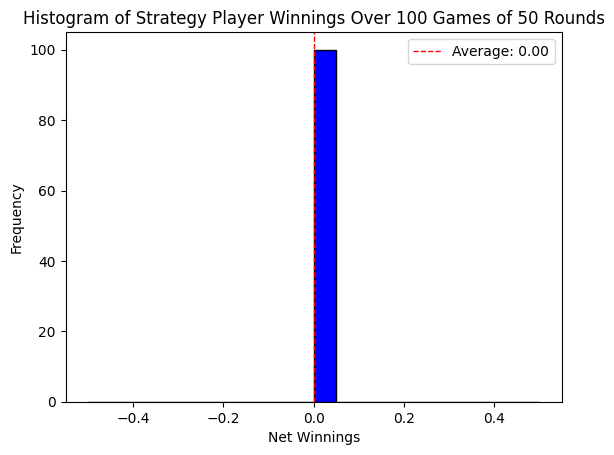

(0.0, 0.0, 0.0, 0.0)

In [9]:
# 8
# Adjusting the StrategyGame class to not print any output and to return the strategy player's final chips count
class StrategyGameNoOutput(StrategyGame):
    def __init__(self, rounds=50):
        super().__init__(rounds, verbose=False)

    def play_game(self):
        for _ in range(self.rounds):
            if self.counting_player.chips <= 0:
                break
            self.deck = Deck()  # Reinitialize the deck for each round
            self.play_round()

        # Return the strategy player's final chip count
        return self.counting_player.chips

# Running 100 games of 50 rounds each and storing the winnings
num_games = 100
winnings_list = []
for _ in range(num_games):
    game = StrategyGameNoOutput(rounds=50)
    final_chips = game.play_game()
    winnings_list.append(final_chips - 100)  # Subtracting the starting chips to get net winnings

# Calculate the average winnings, standard deviation, and probability of net winning/losing
import numpy as np
import matplotlib.pyplot as plt

average_winnings = np.mean(winnings_list)
std_dev = np.std(winnings_list)
probability_net_win = len([w for w in winnings_list if w > 0]) / num_games
probability_net_loss = len([w for w in winnings_list if w < 0]) / num_games

# Histogram of the winnings
plt.hist(winnings_list, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Strategy Player Winnings Over 100 Games of 50 Rounds')
plt.xlabel('Net Winnings')
plt.ylabel('Frequency')
plt.axvline(average_winnings, color='red', linestyle='dashed', linewidth=1, label=f'Average: {average_winnings:.2f}')
plt.legend()

# Display the results
plt.show()

(average_winnings, std_dev, probability_net_win, probability_net_loss)


In [11]:
# 9
import numpy as np

class CardCountingPlayerWithThreshold(QuietCardCountingPlayer):
    def __init__(self, name, chips=100, threshold=-2):
        super().__init__(name, chips)
        self.threshold = threshold

    def play_hand(self, deck, seen_cards):
        for card in seen_cards:
            self.update_count(card)
        while self.hand.calculate_value() < 21:
            if self.count <= self.threshold:
                new_card = deck.draw()
                self.hand.add_card(new_card)
                self.update_count(new_card)
                seen_cards.append(new_card)
            else:
                break

def run_simulation_for_threshold(threshold, rounds=50, games=100):
    winnings_list = []
    for _ in range(games):
        game = StrategyGameNoOutput(rounds)
        game.counting_player = CardCountingPlayerWithThreshold("Strategy Player", threshold=threshold)
        final_chips = game.play_game()
        winnings_list.append(final_chips - 100)  # Assuming starting chips are 100
    return winnings_list

thresholds = [-2, -1, 0, 1, 2]
results = {}

for threshold in thresholds:
    winnings_list = run_simulation_for_threshold(threshold)
    average_winnings = np.mean(winnings_list)
    std_dev = np.std(winnings_list)
    probability_net_win = np.sum(np.array(winnings_list) > 0) / len(winnings_list)
    results[threshold] = {'average_winnings': average_winnings, 'std_dev': std_dev, 'probability_net_win': probability_net_win}

# Find the threshold with the highest average winnings
optimal_threshold = max(results, key=lambda x: results[x]['average_winnings'])

# Output the optimal threshold and its results
print(f"Optimal Threshold: {optimal_threshold}")
for metric, value in results[optimal_threshold].items():
    print(f"{metric}: {value:.2f}")




Optimal Threshold: -2
average_winnings: 0.00
std_dev: 0.00
probability_net_win: 0.00


In [12]:
# 10
class ModifiedStrategyPlayer(QuietCardCountingPlayer):
    def __init__(self, name, chips=100, threshold=5):
        super().__init__(name, chips)
        self.threshold = threshold

    def play_hand(self, deck, seen_cards):
        for card in seen_cards:
            self.update_count(card)
        # Decision based on count and a simplified basic strategy
        while True:
            hand_value = self.hand.calculate_value()
            if self.count >= self.threshold and hand_value >= 12 and hand_value <= 16:
                # Assuming a rich deck in high cards, stand more often in this range
                break
            elif hand_value < 17:
                self.hand.add_card(deck.draw())
            else:
                break

# Run a simulation for this player and compare with the original card counting strategy
def run_simulation(strategy_class, rounds=50, games=100):
    winnings_list = []
    for _ in range(games):
        game = StrategyGameNoOutput(rounds)
        game.counting_player = strategy_class("Strategy Player")
        final_chips = game.play_game()
        winnings_list.append(final_chips - 100)  # Assuming starting chips are 100
    return np.mean(winnings_list), np.std(winnings_list)

# Compare the strategies
original_mean, original_std = run_simulation(QuietCardCountingPlayer)
modified_mean, modified_std = run_simulation(ModifiedStrategyPlayer)

print(f"Original Strategy: Mean = {original_mean}, Std = {original_std}")
print(f"Modified Strategy: Mean = {modified_mean}, Std = {modified_std}")


Original Strategy: Mean = 0.0, Std = 0.0
Modified Strategy: Mean = 0.0, Std = 0.0
